In [ ]:
import sys

sys.path.append("../src/")

import refcm
import json
import logging
import scanpy as sc

from ete3 import Tree, TreeStyle, NodeStyle, TextFace

refcm.start_logging(logging.DEBUG)

# Cell types found in the Allen-Brain datasets (see [here](../experiments/hierarchical.ipynb)).

[h5py._conv      ] [DEBUG   ] : Creating converter from 3 to 5


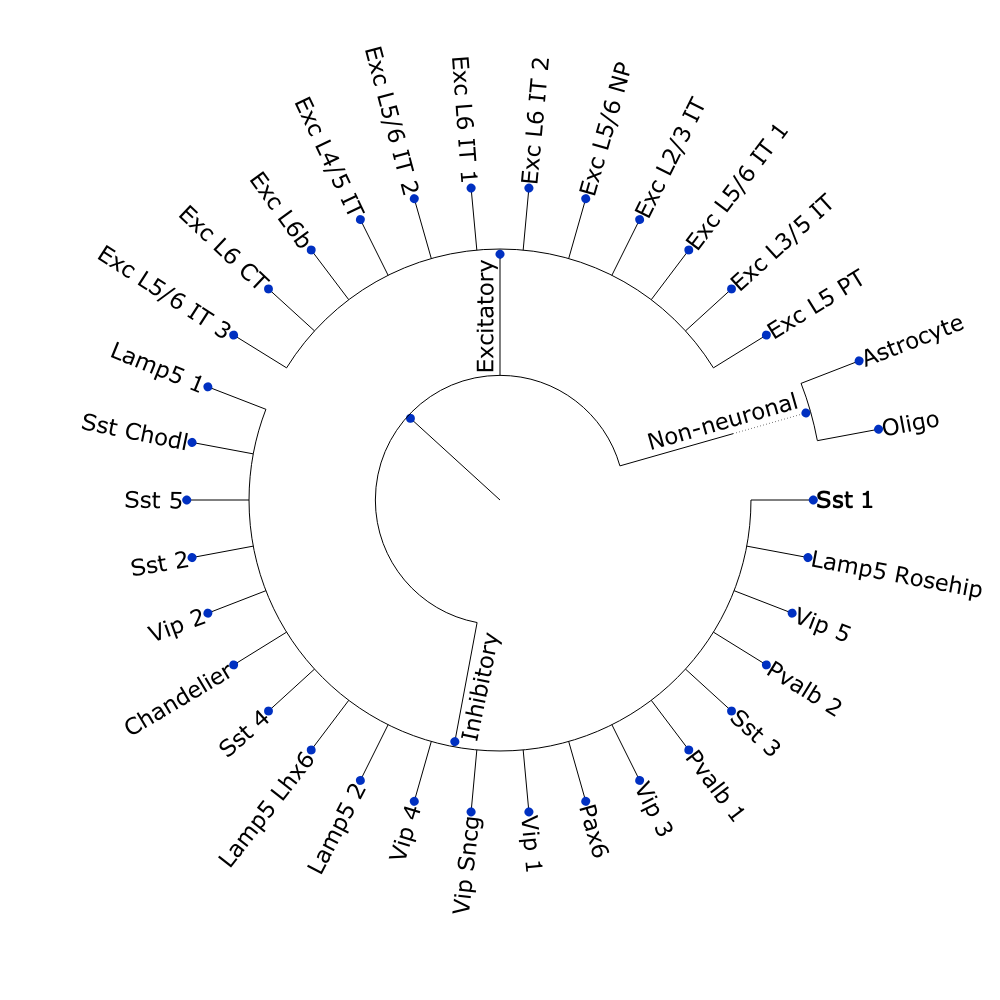

In [2]:
# retrieve hierarchy
mtg = sc.read_h5ad("../data/MTG.h5ad")
labels = mtg.obs[["labels3", "labels34"]].set_index("labels3")
coarse_levels = labels.index.unique().to_list()
hierarchy = {
    level: labels.loc[level].drop_duplicates().values.flatten().tolist()
    for level in coarse_levels
}

# create ete3 tree and styling
tree = Tree()

ts = TreeStyle()
ts.mode = "c"
ts.arc_span = 360
ts.show_leaf_name = False
ts.show_scale = False

nstyle = NodeStyle()
nstyle["size"] = 3

# populate tree object
for parent, children in hierarchy.items():
    p = Tree()
    p.set_style(nstyle)
    p.add_face(TextFace(parent), position="branch-top", column=0)
    for child in children:
        c = Tree()
        c.set_style(nstyle)
        c.add_face(TextFace(child), position="branch-right", column=0)
        p.add_child(c, name=child, dist=0.5)

    tree.add_child(p, name=parent, dist=1)

# render
tree.render("trees/allenbrain.png", w=3000, units="px", dpi=400, tree_style=ts)
tree.render("%%inline", w=1000, units="px", dpi=400, tree_style=ts)